# Mathematical Approach to LDA

In [1]:
import numpy as np
import matplotlib.pyplot as plt


## Step 1: Prepare dataset

In [2]:
x1 = np.array([[4, 2], [2, 4], [2, 3], [3, 6], [4, 4]]) # class 1
x2 = np.array([[9, 10], [6, 8], [9, 5], [8, 7], [10, 8]]) # class 2

## Step 2: Standardize dataset

Compute mean of each class

In [3]:
mean1 = np.mean(x1, axis=0)
mean2 = np.mean(x2, axis=0)

print the result

In [4]:
print(mean1,",", mean2)

[3.  3.8] , [8.4 7.6]


# Step 3: Find the Eigenvalues and Eigenvectors

Calculate the covariance matrix of each class with the following equation:

$$
S_i = \frac{1}{N-1} \sum_{x \in \omega_i} (x - \mu_i)(x - \mu_i)^T
$$

In [5]:
cov1 = np.cov(x1.T) # covariance matrix of class 1
cov2 = np.cov(x2.T) # covariance matrix of class 2

print out the result

In [6]:
print(cov1)
print(cov2)

[[ 1.   -0.25]
 [-0.25  2.2 ]]
[[ 2.3  -0.05]
 [-0.05  3.3 ]]


Calculate the within-class matrix:  

$$
S_i = S_1 + S_2
$$

In [7]:
Sw = cov1 + cov2

print out the result

In [8]:
print(Sw)

[[ 3.3 -0.3]
 [-0.3  5.5]]


Calculate beween-class matrix

$$
S_B = (\mu_i - \mu_j)(\mu_i - \mu_j)^T
$$


Include two parts:

- Calculate the difference between the means of two classes

$$
(\mu_i - \mu_j)
$$

In [9]:
mean_diff = np.atleast_2d(mean1 - mean2)


- Calculate the betwwen-class matrix

In [10]:
Sb = np.dot(mean_diff.T, mean_diff)

print out the result

In [11]:
print(Sb)

[[29.16 20.52]
 [20.52 14.44]]


Find the Eigenvectors and Eigenvalues

In [12]:
eigen_values, eigen_vectors = np.linalg.eig(np.linalg.inv(Sw).dot(Sb))

print out the result

In [13]:
print(eigen_values)
print(eigen_vectors)

[12.20066445  0.        ]
[[ 0.90878558 -0.57549341]
 [ 0.41726342  0.81780642]]


# Step 4: Arrange the Eigenvalues

now we have the feature vector:
$$
\begin{bmatrix}
0.90878558 & -0.57549341
\\[5pt]
0.41726342  & 0.81780642
\end{bmatrix}
$$

The eigenvalues are sorted in descending order. Thus, the matrix is unchanged

## Step 5: Dataset projection

Calculate Fisher LDA

In [14]:
W = eigen_vectors[:, np.argmax(eigen_values)]

In [15]:
print(W)

[0.90878558 0.41726342]


Obtain the LDA

In [16]:
x1_proj = np.dot(x1, W)
x2_proj = np.dot(x2, W)

print out the results

In [17]:
print(x1_proj)
print(x2_proj)

[4.46966918 3.48662485 3.06936143 5.22993727 5.30419602]
[12.35170446  8.79082087 10.26538736 10.19112861 12.4259632 ]


# Step 6: Plotting

Select the top Eigenvector corresponding to Eigenvalue

In [18]:
top_vector = eigen_vectors[:, np.argmax(eigen_values)]

print(top_vector)

[0.90878558 0.41726342]


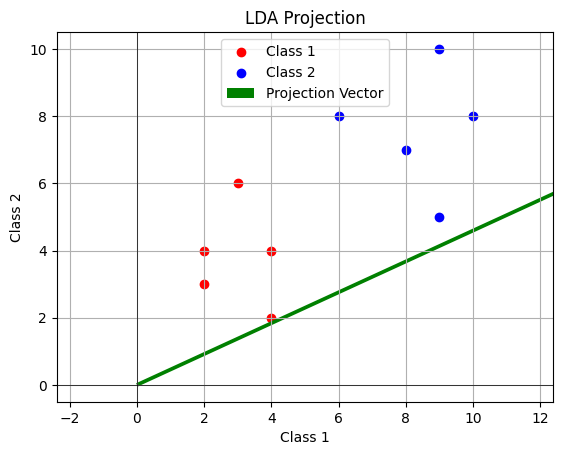

In [19]:
# Lengthen the projection vector for visualization purposes
lengthened_vector = top_vector * 100 

# Plot the original data and the projection vector
plt.scatter(x1[:,0], x1[:,1], color='red', label='Class 1')
plt.scatter(x2[:,0], x2[:,1], color='blue', label='Class 2')

# Plotting the projection vector
plt.quiver(0, 0, lengthened_vector[0], lengthened_vector[1], scale=5, color='green', label='Projection Vector', angles='xy', scale_units='xy')

# Add coordinate lines
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)

plt.xlabel('Class 1')
plt.ylabel('Class 2')
plt.legend()
plt.title('LDA Projection')
plt.grid(True)
plt.axis('equal')
plt.show()